<a href="https://colab.research.google.com/github/aderdouri/EiCNAM/blob/master/Tutorials/cir_plus_plus_aad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

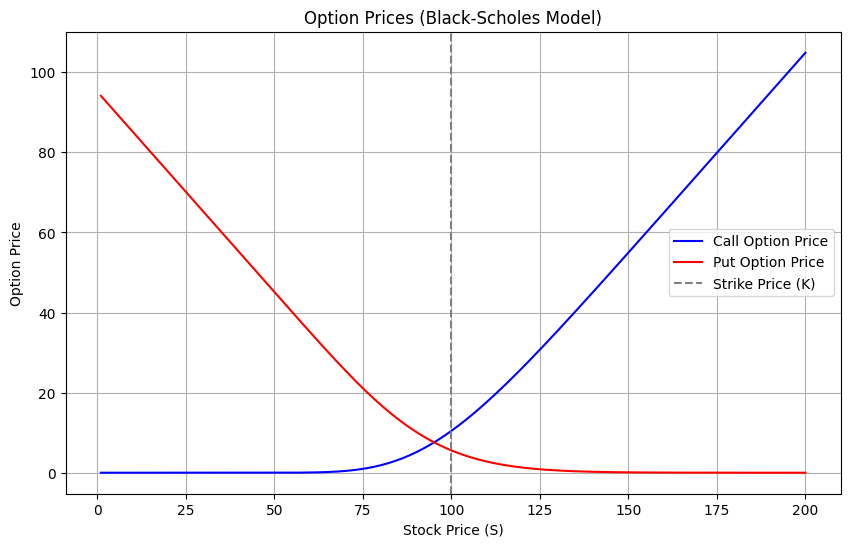

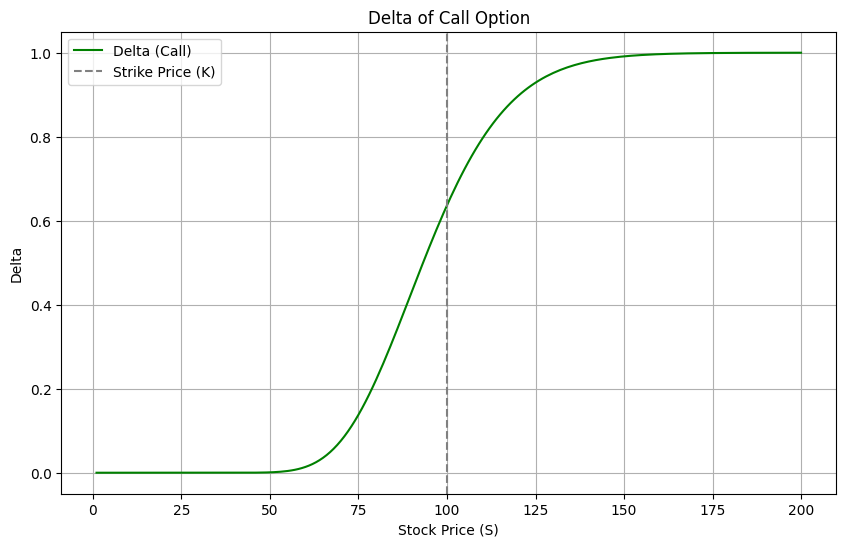

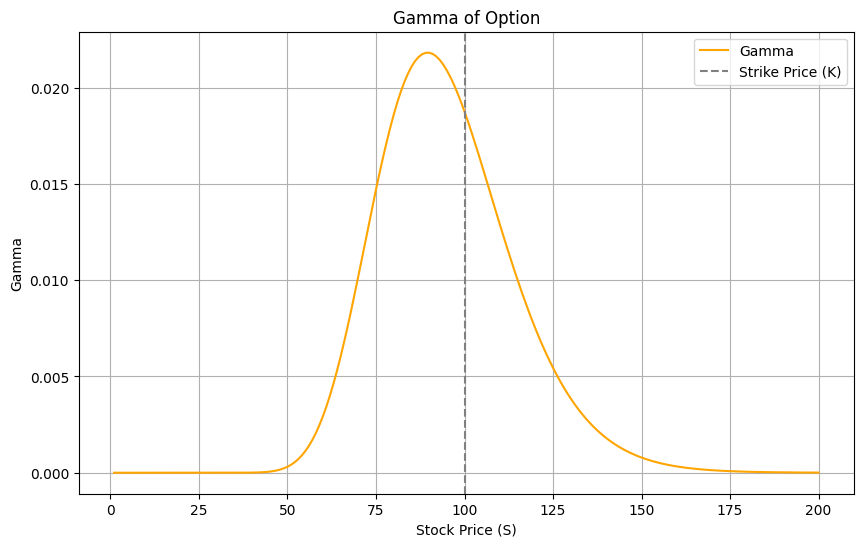

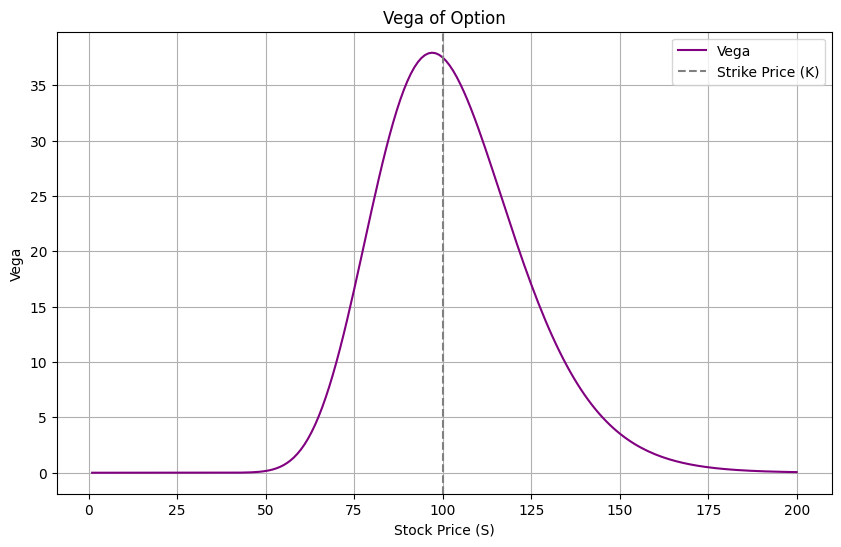

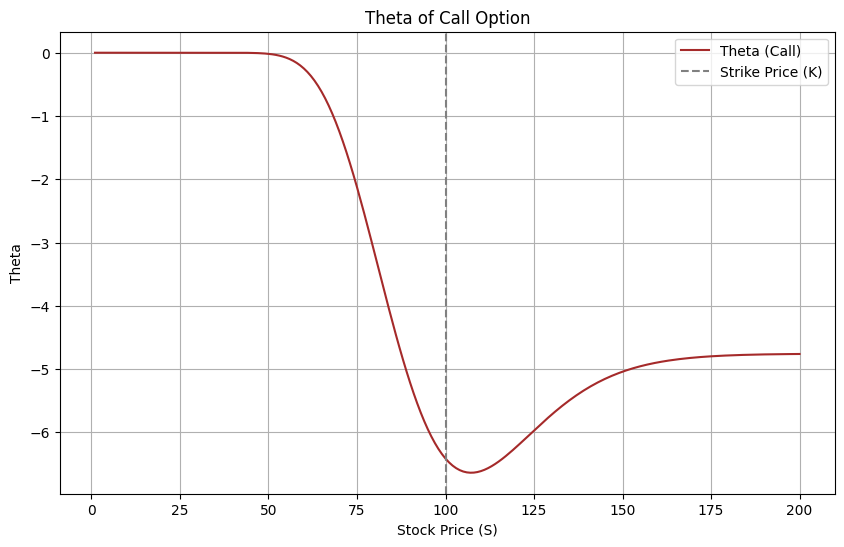

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for European call and put options
def black_scholes(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Greeks
def delta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == "call":
        return norm.cdf(d1)
    elif option_type == "put":
        return norm.cdf(d1) - 1

def gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def theta(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        term1 = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
        term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
        return term1 + term2
    elif option_type == "put":
        term1 = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))
        term2 = r * K * np.exp(-r * T) * norm.cdf(-d2)
        return term1 + term2

# Parameters
S = np.linspace(1, 200, 200)  # Stock price
K = 100                      # Strike price
T = 1.0                      # Time to maturity
r = 0.05                     # Risk-free rate
sigma = 0.2                  # Volatility

# Compute values
call_prices = [black_scholes(s, K, T, r, sigma, option_type="call") for s in S]
put_prices = [black_scholes(s, K, T, r, sigma, option_type="put") for s in S]
deltas = [delta(s, K, T, r, sigma, option_type="call") for s in S]
gammas = [gamma(s, K, T, r, sigma) for s in S]
vegas = [vega(s, K, T, r, sigma) for s in S]
thetas = [theta(s, K, T, r, sigma, option_type="call") for s in S]

# Plot 1: Option Prices
plt.figure(figsize=(10, 6))
plt.plot(S, call_prices, label="Call Option Price", color="blue")
plt.plot(S, put_prices, label="Put Option Price", color="red")
plt.axvline(x=K, color='gray', linestyle="--", label="Strike Price (K)")
plt.title("Option Prices (Black-Scholes Model)")
plt.xlabel("Stock Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid()
plt.show()

# Plot 2: Delta
plt.figure(figsize=(10, 6))
plt.plot(S, deltas, label="Delta (Call)", color="green")
plt.title("Delta of Call Option")
plt.xlabel("Stock Price (S)")
plt.ylabel("Delta")
plt.axvline(x=K, color='gray', linestyle="--", label="Strike Price (K)")
plt.legend()
plt.grid()
plt.show()

# Plot 3: Gamma
plt.figure(figsize=(10, 6))
plt.plot(S, gammas, label="Gamma", color="orange")
plt.title("Gamma of Option")
plt.xlabel("Stock Price (S)")
plt.ylabel("Gamma")
plt.axvline(x=K, color='gray', linestyle="--", label="Strike Price (K)")
plt.legend()
plt.grid()
plt.show()

# Plot 4: Vega
plt.figure(figsize=(10, 6))
plt.plot(S, vegas, label="Vega", color="purple")
plt.title("Vega of Option")
plt.xlabel("Stock Price (S)")
plt.ylabel("Vega")
plt.axvline(x=K, color='gray', linestyle="--", label="Strike Price (K)")
plt.legend()
plt.grid()
plt.show()

# Plot 5: Theta
plt.figure(figsize=(10, 6))
plt.plot(S, thetas, label="Theta (Call)", color="brown")
plt.title("Theta of Call Option")
plt.xlabel("Stock Price (S)")
plt.ylabel("Theta")
plt.axvline(x=K, color='gray', linestyle="--", label="Strike Price (K)")
plt.legend()
plt.grid()
plt.show()


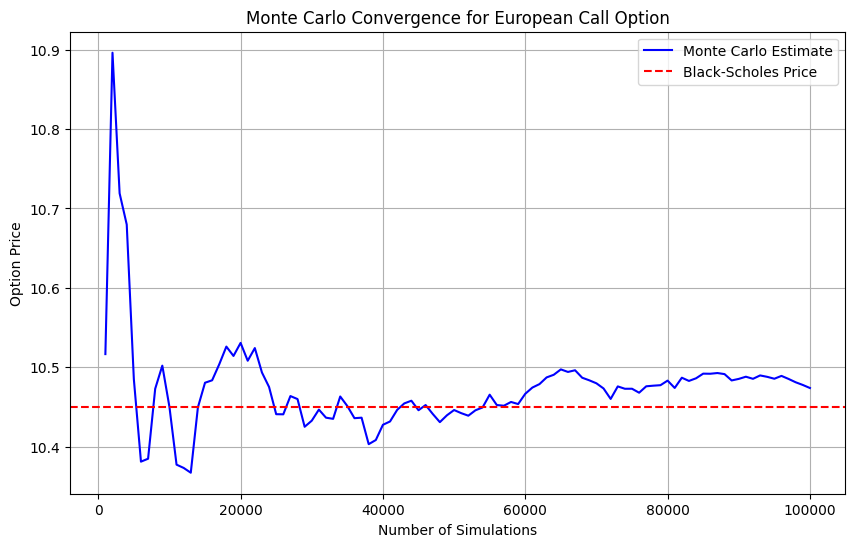

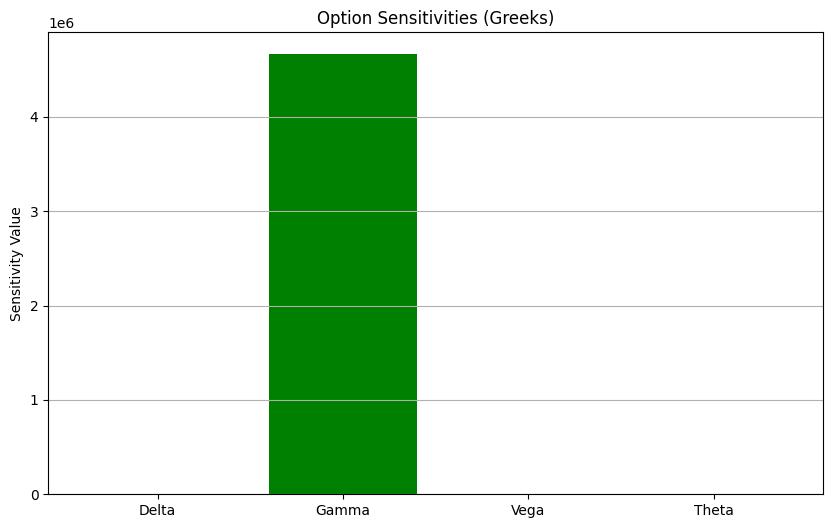

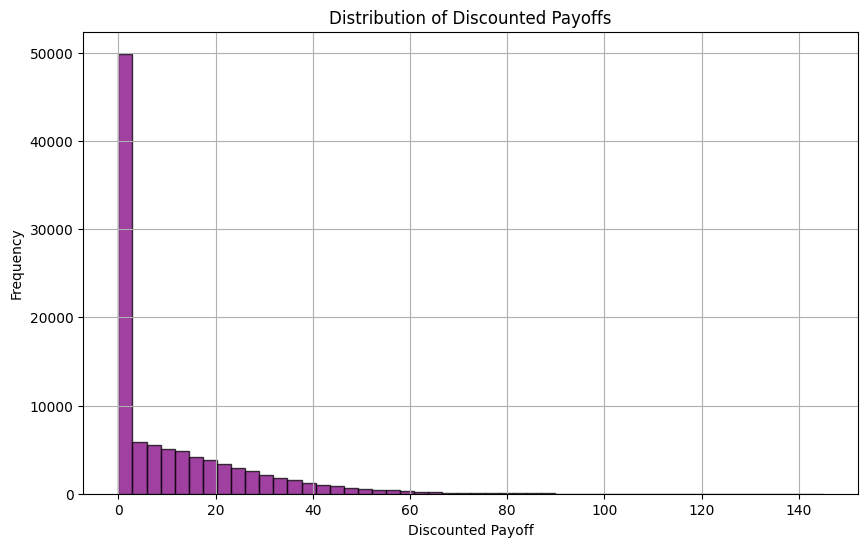

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes closed-form solution (for comparison)
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Monte Carlo simulation for European call option
def monte_carlo_call(S, K, T, r, sigma, n_simulations):
    np.random.seed(42)  # For reproducibility
    Z = np.random.normal(0, 1, n_simulations)  # Standard normal random variables
    ST = S * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)  # Stock prices at maturity
    payoff = np.maximum(ST - K, 0)  # Payoff of the call option
    discounted_payoff = np.exp(-r * T) * payoff  # Discounted payoff
    price = np.mean(discounted_payoff)  # Monte Carlo estimate
    return price, discounted_payoff

# Sensitivities using finite differences
def sensitivities(S, K, T, r, sigma, n_simulations):
    h = 1e-4  # Small change for finite differences

    # Delta
    price_up, _ = monte_carlo_call(S + h, K, T, r, sigma, n_simulations)
    price_down, _ = monte_carlo_call(S - h, K, T, r, sigma, n_simulations)
    delta = (price_up - price_down) / (2 * h)

    # Gamma
    gamma = (price_up - 2 * black_scholes_call(S, K, T, r, sigma) + price_down) / (h**2)

    # Vega
    price_vega_up, _ = monte_carlo_call(S, K, T, r, sigma + h, n_simulations)
    vega = (price_vega_up - black_scholes_call(S, K, T, r, sigma)) / h

    # Theta
    price_theta_up, _ = monte_carlo_call(S, K, T - h, r, sigma, n_simulations)
    theta = (price_theta_up - black_scholes_call(S, K, T, r, sigma)) / h

    return delta, gamma, vega, theta

# Parameters
S = 100         # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity
r = 0.05        # Risk-free rate
sigma = 0.2     # Volatility
n_simulations = 100000  # Number of Monte Carlo simulations

# Monte Carlo pricing and convergence
prices = []
convergence_steps = range(1000, n_simulations + 1, 1000)
for n in convergence_steps:
    price, _ = monte_carlo_call(S, K, T, r, sigma, n)
    prices.append(price)

# Calculate sensitivities
delta, gamma, vega, theta = sensitivities(S, K, T, r, sigma, n_simulations)

# Black-Scholes price for comparison
bs_price = black_scholes_call(S, K, T, r, sigma)

# Plot 1: Monte Carlo Convergence
plt.figure(figsize=(10, 6))
plt.plot(convergence_steps, prices, label="Monte Carlo Estimate", color="blue")
plt.axhline(y=bs_price, color="red", linestyle="--", label="Black-Scholes Price")
plt.xlabel("Number of Simulations")
plt.ylabel("Option Price")
plt.title("Monte Carlo Convergence for European Call Option")
plt.legend()
plt.grid()
plt.show()

# Plot 2: Sensitivities (Delta, Gamma, Vega, Theta)
sensitivities_data = {"Delta": delta, "Gamma": gamma, "Vega": vega, "Theta": theta}
plt.figure(figsize=(10, 6))
plt.bar(sensitivities_data.keys(), sensitivities_data.values(), color=["blue", "green", "orange", "red"])
plt.title("Option Sensitivities (Greeks)")
plt.ylabel("Sensitivity Value")
plt.grid(axis="y")
plt.show()

# Plot 3: Distribution of Payoffs
_, discounted_payoffs = monte_carlo_call(S, K, T, r, sigma, n_simulations)
plt.figure(figsize=(10, 6))
plt.hist(discounted_payoffs, bins=50, color="purple", alpha=0.75, edgecolor="black")
plt.title("Distribution of Discounted Payoffs")
plt.xlabel("Discounted Payoff")
plt.ylabel("Frequency")
plt.grid()
plt.show()

CVA: 0.4971


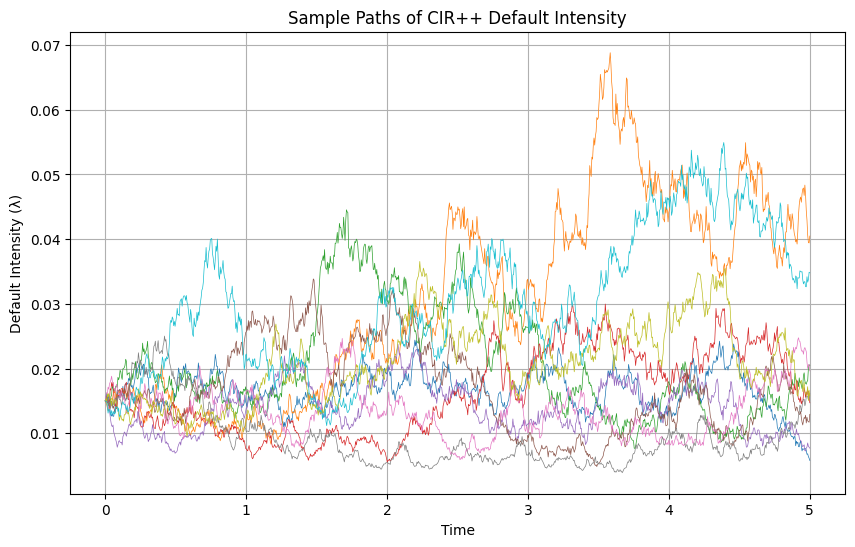

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for CIR process
k = 0.5          # Speed of mean reversion
mu = 0.02        # Long-term mean level
nu = 0.1         # Volatility
x0 = 0.01        # Initial value of the CIR process

# Parameters for deterministic shift
def phi(t):
    return 0.005 * np.exp(-0.1 * t)  # Example deterministic shift

# Simulation parameters
T = 5.0          # Time to maturity
N = 1000         # Number of time steps
dt = T / N       # Time step size
num_paths = 10000  # Number of Monte Carlo paths

# Simulate CIR++ process
def simulate_cir_plus_plus():
    time_grid = np.linspace(0, T, N)
    x = np.zeros((num_paths, N))  # CIR process
    x[:, 0] = x0

    for t in range(1, N):
        Z = np.random.normal(0, 1, num_paths)  # Standard normal random variables
        x_t = np.maximum(x[:, t-1], 0)  # Ensure positivity
        drift = k * (mu - x_t) * dt
        diffusion = nu * np.sqrt(x_t) * np.sqrt(dt) * Z
        x[:, t] = x_t + drift + diffusion

    # Add deterministic shift
    lambda_t = x + phi(time_grid)
    return lambda_t, time_grid

# Calculate CVA using CIR++ intensity
def calculate_cva():
    lambda_t, time_grid = simulate_cir_plus_plus()
    payoff = 10  # Example constant payoff
    LGD = 0.6  # Loss given default
    r = 0.03  # Risk-free rate

    # Integrate lambda_t to get the hazard function
    integrated_hazard = np.cumsum(lambda_t * dt, axis=1)

    # Survival probabilities and CVA calculation
    survival_prob = np.exp(-integrated_hazard)  # Survival probability
    discounted_payoff = np.exp(-r * time_grid[-1]) * payoff
    cva = LGD * np.mean((1 - survival_prob[:, -1]) * discounted_payoff)
    return cva, lambda_t, time_grid

# Run the simulation and calculate CVA
cva, lambda_t, time_grid = calculate_cva()
print(f"CVA: {cva:.4f}")

# Plot the simulated lambda_t paths
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot 10 sample paths
    plt.plot(time_grid, lambda_t[i, :], lw=0.5)
plt.title("Sample Paths of CIR++ Default Intensity")
plt.xlabel("Time")
plt.ylabel("Default Intensity (λ)")
plt.grid()
plt.show()

European Call Option Price: 19.8943
European Put Option Price: 8.1385
Delta: 675.2744
Gamma: -45659829.001399
Vega: -625.8132
Theta: 438.2524


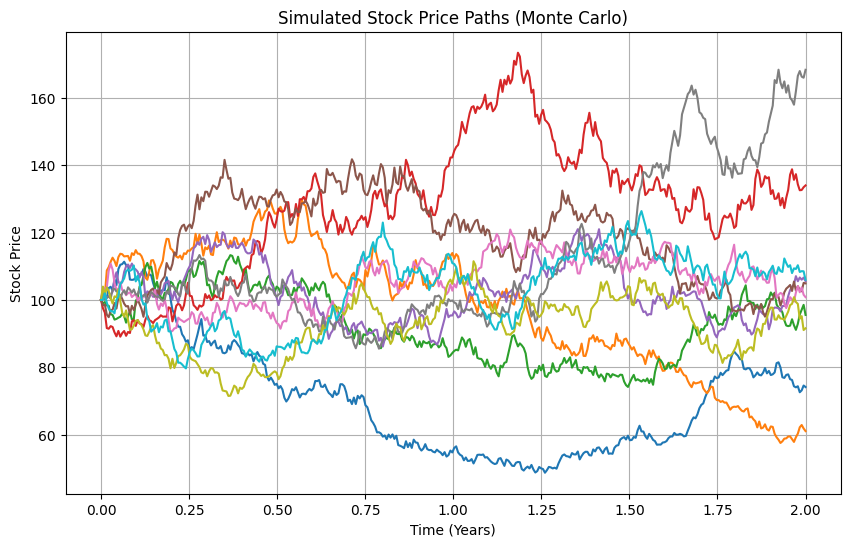

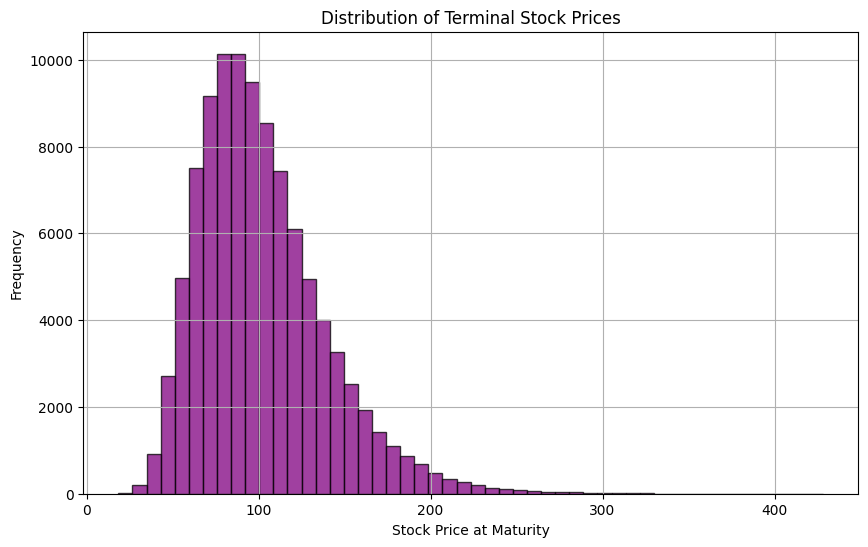

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100.0  # Initial stock price
r = 0.01    # Risk-free rate
T = 2.0     # Time to maturity
sigma = 0.25  # Volatility
K = 90.0    # Strike price
n_simulations = 100000  # Number of Monte Carlo simulations
n_steps = 365  # Daily time steps for path generation

# Monte Carlo simulation for stock price
def simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps):
    dt = T / n_steps  # Time step
    Z = np.random.normal(0, 1, (n_simulations, n_steps))  # Random normal variables
    stock_paths = np.zeros((n_simulations, n_steps + 1))
    stock_paths[:, 0] = S0  # Initial stock price
    for t in range(1, n_steps + 1):
        stock_paths[:, t] = stock_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
    return stock_paths

# Monte Carlo pricing of European options
def monte_carlo_pricing(stock_paths, K, r, T):
    # Extract terminal stock prices
    ST = stock_paths[:, -1]
    # Calculate payoffs
    call_payoffs = np.maximum(ST - K, 0)
    put_payoffs = np.maximum(K - ST, 0)
    # Discounted expected payoff
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    put_price = np.exp(-r * T) * np.mean(put_payoffs)
    return call_price, put_price

# Sensitivities (Greeks) using finite differences
def calculate_greeks(S0, r, T, sigma, K, n_simulations, n_steps):
    h = 1e-4  # Small change for finite differences

    # Delta
    stock_paths_up = simulate_stock_price(S0 + h, r, T, sigma, n_simulations, n_steps)
    stock_paths_down = simulate_stock_price(S0 - h, r, T, sigma, n_simulations, n_steps)
    call_price_up, _ = monte_carlo_pricing(stock_paths_up, K, r, T)
    call_price_down, _ = monte_carlo_pricing(stock_paths_down, K, r, T)
    delta = (call_price_up - call_price_down) / (2 * h)

    # Gamma
    gamma = (call_price_up - 2 * monte_carlo_pricing(simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps), K, r, T)[0] + call_price_down) / (h**2)

    # Vega
    stock_paths_vega = simulate_stock_price(S0, r, T, sigma + h, n_simulations, n_steps)
    call_price_vega, _ = monte_carlo_pricing(stock_paths_vega, K, r, T)
    vega = (call_price_vega - monte_carlo_pricing(simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps), K, r, T)[0]) / h

    # Theta
    stock_paths_theta = simulate_stock_price(S0, r, T - h, sigma, n_simulations, n_steps)
    call_price_theta, _ = monte_carlo_pricing(stock_paths_theta, K, r, T - h)
    theta = (call_price_theta - monte_carlo_pricing(simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps), K, r, T)[0]) / h

    return delta, gamma, vega, theta

# Run the simulation and pricing
stock_paths = simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps)
call_price, put_price = monte_carlo_pricing(stock_paths, K, r, T)

# Calculate Greeks
delta, gamma, vega, theta = calculate_greeks(S0, r, T, sigma, K, n_simulations, n_steps)

# Output results
print(f"European Call Option Price: {call_price:.4f}")
print(f"European Put Option Price: {put_price:.4f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.6f}")
print(f"Vega: {vega:.4f}")
print(f"Theta: {theta:.4f}")

# Plot stock paths
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot 10 sample paths
    plt.plot(np.linspace(0, T, n_steps + 1), stock_paths[i, :])
plt.title("Simulated Stock Price Paths (Monte Carlo)")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Plot histogram of terminal stock prices
plt.figure(figsize=(10, 6))
plt.hist(stock_paths[:, -1], bins=50, color="purple", alpha=0.75, edgecolor="black")
plt.title("Distribution of Terminal Stock Prices")
plt.xlabel("Stock Price at Maturity")
plt.ylabel("Frequency")
plt.grid()
plt.show()


CVA: 10.2514


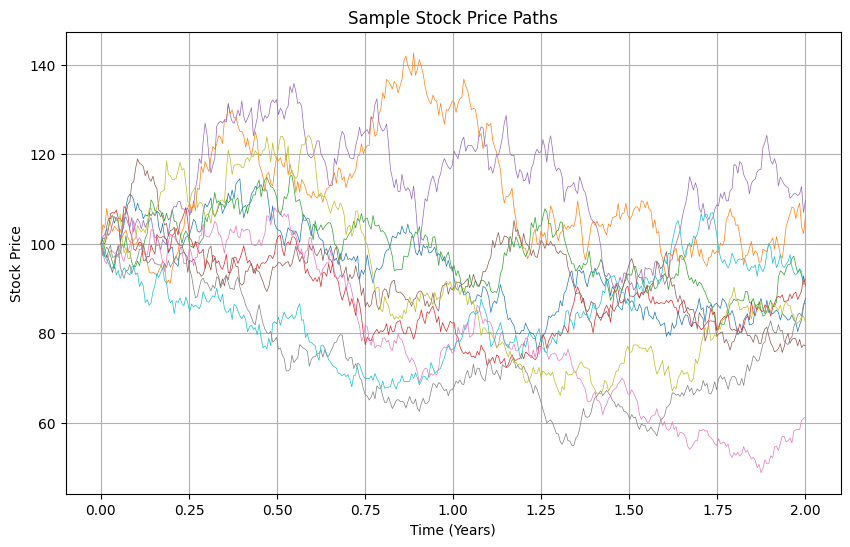

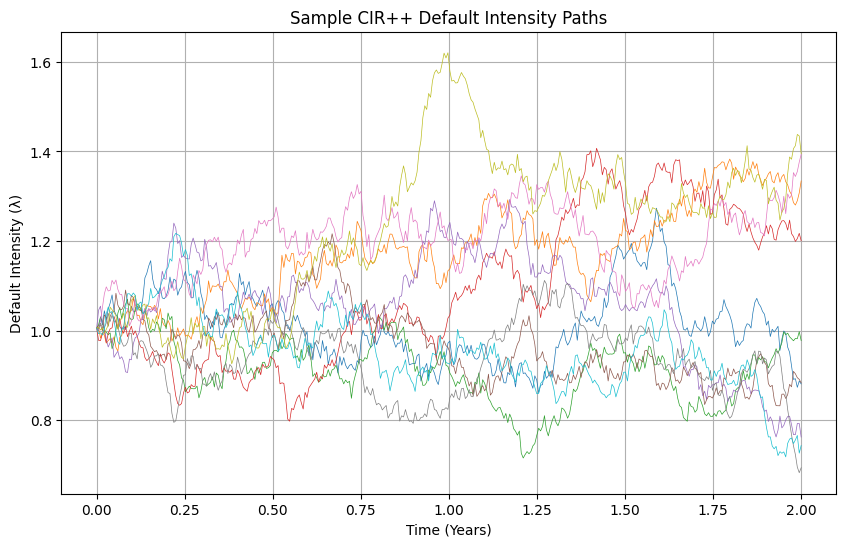

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for stock simulation
S0 = 100.0  # Initial stock price
r = 0.01    # Risk-free rate
T = 2.0     # Time to maturity
sigma = 0.25  # Volatility
K = 90.0    # Strike price

# λ0 = 1.0, k= 0.5, µ= 1.0, ν = 0.25 and a LGD = 0.6.
# Parameters for CIR++ model
k = 0.5      # Speed of mean reversion
mu = 1.0    # Long-term mean level
nu = 0.25     # Volatility of the CIR process
x0 = 1.0    # Initial default intensity
LGD = 0.6    # Loss Given Default
phi = lambda t: 0.005 * np.exp(-0.1 * t)  # Deterministic shift

# Simulation parameters
n_simulations = 100000
n_steps = 365
dt = T / n_steps

# Simulate stock price paths
def simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps):
    Z = np.random.normal(0, 1, (n_simulations, n_steps))
    stock_paths = np.zeros((n_simulations, n_steps + 1))
    stock_paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        stock_paths[:, t] = stock_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1])
    return stock_paths

# Simulate CIR++ default intensity
def simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi):
    dt = T / n_steps
    time_grid = np.linspace(0, T, n_steps + 1)
    x = np.zeros((n_simulations, n_steps + 1))
    x[:, 0] = x0
    Z = np.random.normal(0, 1, (n_simulations, n_steps))

    for t in range(1, n_steps + 1):
        x_t = np.maximum(x[:, t-1], 0)
        drift = k * (mu - x_t) * dt
        diffusion = nu * np.sqrt(x_t) * np.sqrt(dt) * Z[:, t-1]
        x[:, t] = x_t + drift + diffusion

    lambda_t = x + phi(time_grid)  # Add deterministic shift
    return lambda_t, time_grid

# Calculate CVA
def calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps):
    # Simulate stock paths and default intensity paths
    stock_paths = simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps)
    lambda_t, time_grid = simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi)

    # Compute integrated hazard and survival probabilities
    integrated_hazard = np.cumsum(lambda_t[:, :-1] * dt, axis=1)
    survival_prob = np.exp(-integrated_hazard[:, -1])  # Survival probability at T

    # Compute payoff and CVA
    ST = stock_paths[:, -1]  # Terminal stock prices
    payoff = np.maximum(ST - K, 0)  # Call option payoff
    discounted_payoff = np.exp(-r * T) * payoff
    cva = LGD * np.mean((1 - survival_prob) * discounted_payoff)
    return cva, lambda_t, stock_paths, time_grid

# Run the CVA calculation
cva, lambda_t, stock_paths, time_grid = calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps)
print(f"CVA: {cva:.4f}")

# Plot 1: Sample stock price paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(np.linspace(0, T, n_steps + 1), stock_paths[i, :], lw=0.5)
plt.title("Sample Stock Price Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Plot 2: Sample default intensity paths
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(time_grid, lambda_t[i, :], lw=0.5)
plt.title("Sample CIR++ Default Intensity Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Default Intensity (λ)")
plt.grid()
plt.show()


CVA: 10.2086


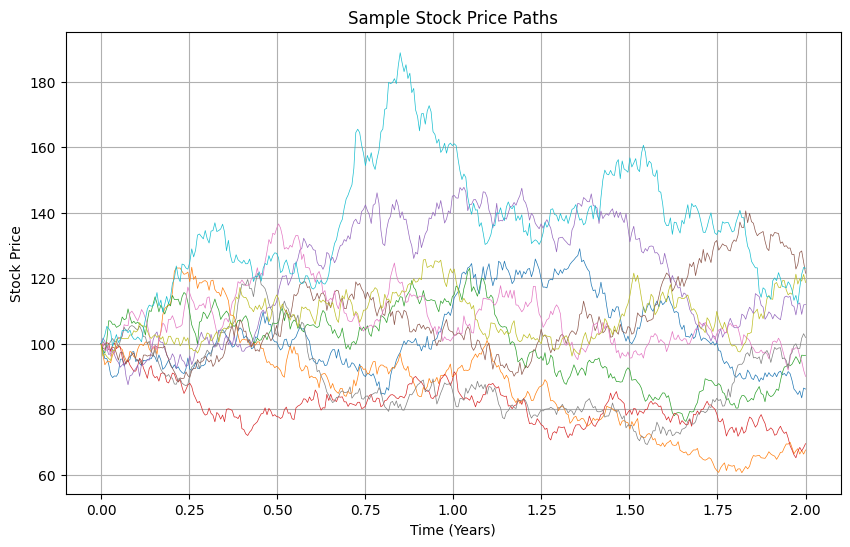

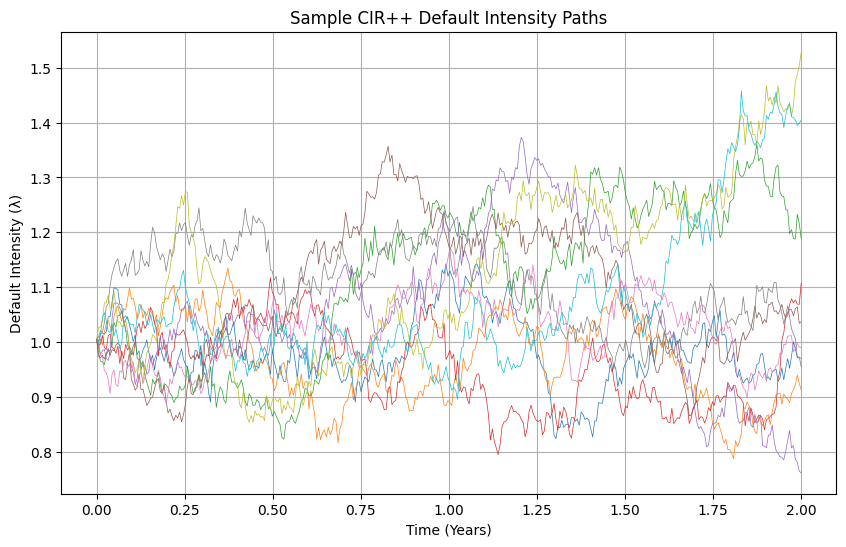

In [8]:
import torch
import matplotlib.pyplot as plt

# Parameters for stock simulation

S0 = 100.0  # Initial stock price
r = 0.01    # Risk-free rate
T = 2.0     # Time to maturity
sigma = 0.25  # Volatility
K = 90.0    # Strike price

# λ0 = 1.0, k= 0.5, µ= 1.0, ν = 0.25 and a LGD = 0.6.
# Parameters for CIR++ model
k = 0.5      # Speed of mean reversion
mu = 1.0    # Long-term mean level
nu = 0.25     # Volatility of the CIR process
x0 = 1.0    # Initial default intensity
LGD = 0.6    # Loss Given Default

phi = lambda t: 0.005 * torch.exp(-0.1 * t)  # Deterministic shift

# Simulation parameters
n_simulations = 100000
n_steps = 365
dt = T / n_steps

# Simulate stock price paths
def simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps):
    dt = T / n_steps
    Z = torch.randn((n_simulations, n_steps))  # Standard normal random variables
    stock_paths = torch.zeros((n_simulations, n_steps + 1))
    stock_paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        stock_paths[:, t] = stock_paths[:, t-1] * torch.exp(
            (r - 0.5 * sigma**2) * dt + sigma * torch.sqrt(torch.tensor(dt)) * Z[:, t-1]
        )
    return stock_paths

# Simulate CIR++ default intensity
def simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi):
    dt = T / n_steps
    time_grid = torch.linspace(0, T, n_steps + 1)
    x = torch.zeros((n_simulations, n_steps + 1))
    x[:, 0] = x0
    Z = torch.randn((n_simulations, n_steps))

    for t in range(1, n_steps + 1):
        x_t = torch.relu(x[:, t-1])  # Ensure positivity
        drift = k * (mu - x_t) * dt
        diffusion = nu * torch.sqrt(x_t) * torch.sqrt(torch.tensor(dt)) * Z[:, t-1]
        x[:, t] = x_t + drift + diffusion

    lambda_t = x + phi(time_grid)  # Add deterministic shift
    return lambda_t, time_grid

# Calculate CVA
# Calculate CVA
def calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps):
    # Simulate stock paths and default intensity paths
    stock_paths = simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps)
    lambda_t, time_grid = simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi)

    # Compute integrated hazard and survival probabilities
    integrated_hazard = torch.cumsum(lambda_t[:, :-1] * dt, dim=1)
    survival_prob = torch.exp(-integrated_hazard[:, -1])  # Survival probability at T

    # Compute payoff and CVA
    ST = stock_paths[:, -1]  # Terminal stock prices
    payoff = torch.relu(ST - K)  # Call option payoff
    discounted_payoff = torch.exp(torch.tensor(-r * T)) * payoff  # Fixed line
    cva = LGD * torch.mean((1 - survival_prob) * discounted_payoff)
    return cva, lambda_t, stock_paths, time_grid

# Run the CVA calculation
cva, lambda_t, stock_paths, time_grid = calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps)
print(f"CVA: {cva:.4f}")

# Plot 1: Sample stock price paths
stock_paths_cpu = stock_paths[:10, :]  # First 10 paths
time_grid_cpu = time_grid.numpy()

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(time_grid_cpu, stock_paths_cpu[i, :].numpy(), lw=0.5)
plt.title("Sample Stock Price Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Plot 2: Sample default intensity paths
lambda_t_cpu = lambda_t[:10, :]  # First 10 paths

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(time_grid_cpu, lambda_t_cpu[i, :].numpy(), lw=0.5)
plt.title("Sample CIR++ Default Intensity Paths")
plt.xlabel("Time (Years)")
plt.ylabel("Default Intensity (λ)")
plt.grid()
plt.show()

In [9]:
# Calculate CVA sensitivity to initial default intensity
def calculate_cva_sensitivity(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps, h):
    # CVA for lambda_0 + h
    cva_plus_h, _, _, _ = calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0 + h, phi, n_simulations, n_steps)

    # CVA for lambda_0 - h
    cva_minus_h, _, _, _ = calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0 - h, phi, n_simulations, n_steps)

    # Sensitivity
    sensitivity = (cva_plus_h - cva_minus_h) / (2 * h)
    return sensitivity

# Parameters
h = 1e-4  # Small perturbation for finite differences

# Calculate CVA and its sensitivity to initial lambda
cva, lambda_t, stock_paths, time_grid = calculate_cva(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps)
sensitivity = calculate_cva_sensitivity(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps, h)

# Output results
print(f"CVA: {cva:.4f}")
print(f"Sensitivity of CVA to Initial Lambda: {sensitivity:.4f}")


CVA: 10.2403
Sensitivity of CVA to Initial Lambda: -550.7803


In [10]:
import torch

# Modified calculate_cva to support autograd
def calculate_cva_autograd(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps):
    # Ensure x0 is a tensor that requires gradients
    x0 = torch.tensor(x0, requires_grad=True)

    # Simulate stock paths
    stock_paths = simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps)

    # Simulate CIR++ paths
    lambda_t, time_grid = simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi)

    # Compute integrated hazard and survival probabilities
    integrated_hazard = torch.cumsum(lambda_t[:, :-1] * dt, dim=1)
    survival_prob = torch.exp(-integrated_hazard[:, -1])  # Survival probability at T

    # Compute payoff and CVA
    ST = stock_paths[:, -1]  # Terminal stock prices
    payoff = torch.relu(ST - K)  # Call option payoff
    discounted_payoff = torch.exp(torch.tensor(-r * T)) * payoff
    cva = LGD * torch.mean((1 - survival_prob) * discounted_payoff)

    return cva, x0

# Parameters
x0 = 1.0  # Initial default intensity (lambda_0)

# Calculate CVA and differentiate w.r.t. x0
cva, x0_tensor = calculate_cva_autograd(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations, n_steps)

# Perform backward pass to compute gradient
cva.backward()

# Sensitivity is the gradient of CVA w.r.t. x0
sensitivity = x0_tensor.grad.item()

# Output results
print(f"CVA: {cva.item():.4f}")
print(f"Sensitivity of CVA to Initial Lambda: {sensitivity:.4f}")


CVA: 10.2827
Sensitivity of CVA to Initial Lambda: 2.0606


In [ ]:
import torch

# Simulate stock price paths
def simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps):
    dt = T / n_steps
    Z = torch.randn((n_simulations, n_steps))
    stock_paths = torch.zeros((n_simulations, n_steps + 1))
    stock_paths[:, 0] = S0
    for t in range(1, n_steps + 1):
        stock_paths[:, t] = stock_paths[:, t-1] * torch.exp(
            (r - 0.5 * sigma**2) * dt + sigma * torch.sqrt(torch.tensor(dt)) * Z[:, t-1]
        )
    return stock_paths

# Simulate CIR++ default intensity
def simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi):
    dt = T / n_steps
    time_grid = torch.linspace(0, T, n_steps + 1)
    x = torch.zeros((n_simulations, n_steps + 1))
    x[:, 0] = x0  # Ensure lambda_0 is a tensor
    Z = torch.randn((n_simulations, n_steps))

    for t in range(1, n_steps + 1):
        x_t = torch.relu(x[:, t-1])  # Ensure positivity
        drift = k * (mu - x_t) * dt
        diffusion = nu * torch.sqrt(x_t) * torch.sqrt(torch.tensor(dt)) * Z[:, t-1]
        x[:, t] = x_t + drift + diffusion

    lambda_t = x + phi(time_grid)  # Add deterministic shift
    return lambda_t, time_grid

# Price Bermudan put option using Least Squares Monte Carlo (LSM)
def bermudan_put_price(S0, r, T, sigma, K, n_simulations, n_steps, exercise_dates):
    dt = T / n_steps
    stock_paths = simulate_stock_price(S0, r, T, sigma, n_simulations, n_steps)
    payoff = torch.maximum(K - stock_paths[:, -1], torch.tensor(0.0))  # Payoff at maturity

    # Initialize option value to payoff at maturity
    option_value = payoff.clone()

    # Loop backward through exercise dates
    for t in reversed(exercise_dates):
        in_the_money = (K - stock_paths[:, t] > 0)  # In-the-money paths
        x = stock_paths[in_the_money, t].unsqueeze(1)  # Stock prices for ITM paths

        # Convert float to tensor for PyTorch compatibility
        discount_factor = torch.exp(torch.tensor(-r * dt * (n_steps - t)))

        y = discount_factor * option_value[in_the_money]  # Discounted continuation value

        # Regression to approximate continuation value
        if len(x) > 0:
            regression_coeff = torch.linalg.lstsq(torch.hstack([torch.ones_like(x), x, x**2]), y).solution
            continuation_value = (torch.hstack([torch.ones_like(x), x, x**2]) @ regression_coeff).squeeze()
        else:
            continuation_value = torch.zeros_like(x)

        # Compare continuation value with intrinsic value
        intrinsic_value = K - stock_paths[in_the_money, t]
        exercise = intrinsic_value > continuation_value
        option_value[in_the_money] = torch.where(exercise, intrinsic_value, option_value[in_the_money])

    # Discount the option value to today
    bermudan_price = torch.mean(torch.exp(torch.tensor(-r * T)) * option_value)
    return bermudan_price

# Calculate CVA for Bermudan put option
def calculate_cva_bermudan(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi, n_simulations,
                           n_steps, exercise_dates):
    # Ensure x0 is a tensor that requires gradients
    x0 = torch.tensor(x0, requires_grad=True)

    # Compute Bermudan put option price
    bermudan_price = bermudan_put_price(S0, r, T, sigma, K, n_simulations, n_steps, exercise_dates)
    print(f"Price for Bermudan Put Option: {bermudan_price:.4f}")

    # Simulate CIR++ intensity paths
    lambda_t, _ = simulate_cir_plus_plus(T, n_simulations, n_steps, k, mu, nu, x0, phi)

    dt = T / n_steps  # Fix added here

    # Compute integrated hazard and survival probabilities
    integrated_hazard = torch.cumsum(lambda_t[:, :-1] * dt, dim=1)
    survival_prob = torch.exp(-integrated_hazard[:, -1])  # Survival probability at T

    # Compute CVA
    cva = LGD * torch.mean((1 - survival_prob) * bermudan_price)

    return cva, x0

# Calculate CVA sensitivity to initial lambda_0 using automatic differentiation
def calculate_cva_sensitivity(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi,
                              n_simulations, n_steps, exercise_dates):
    # Compute CVA with autograd
    cva, x0_tensor = calculate_cva_bermudan(S0, r, T, sigma, K, LGD, k, mu, nu,
                                            x0, phi, n_simulations, n_steps, exercise_dates)

    # Perform backpropagation to compute derivative of CVA w.r.t. lambda_0
    cva.backward()

    # Sensitivity is the gradient of CVA w.r.t. lambda_0
    sensitivity = x0_tensor.grad.item()
    return sensitivity, cva.item()

# Parameters
# S0 = 1.0, σ = 0.2, r = 0.15, K = 0.9.
S0 = 1.0  # Initial stock price
sigma = 0.2  # Volatility
K = 0.9    # Strike price
r = 0.15    # Risk-free rate
T = 3.0     # Time to maturity

# λ0 = 1.0, k= 0.5, µ= 1.0, ν = 0.25 and a LGD = 0.6.
x0 = 1.0     # Initial default intensity
k = 0.5      # Speed of mean reversion
mu = 1.0     # Long-term mean
nu = 0.25    # CIR volatility
LGD = 0.6    # Loss Given Default

phi = lambda t: 0.005 * torch.exp(-0.1 * t)  # Deterministic shift
n_simulations = 500000
n_steps = 365*3
exercise_dates = [90 * i for i in range(1, 13)]  # Exercise dates (quarterly)

# Compute CVA and its sensitivity w.r.t. lambda_0
sensitivity, cva = calculate_cva_sensitivity(S0, r, T, sigma, K, LGD, k, mu, nu, x0, phi,
                                             n_simulations, n_steps, exercise_dates)

# Output results
print(f"CVA for Bermudan Put Option: {cva:.4f}")
print(f"Sensitivity of CVA to Initial Lambda (λ₀): {sensitivity:.4f}")


Price for Bermudan Put Option: 0.0117


In [13]:
import numpy as np

In [17]:
# prompt: complete [90, 180, 270,...`, ..... ] (consider 3 years)

exercise_dates = [90, 180, 270, 365]  # Exercise dates (quarterly)
np.linspace(90, 3*360, 12)

array([  90.,  180.,  270.,  360.,  450.,  540.,  630.,  720.,  810.,
        900.,  990., 1080.])

In [1]:
exercise_dates = [90 * i for i in range(1, 13)]

In [2]:
exercise_dates

[90, 180, 270, 360, 450, 540, 630, 720, 810, 900, 990, 1080]